In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('Student Depression Dataset.csv')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [15]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


 # Je veux identifier les colonnes qui nécessitent un traitement pour les données manquantes avant la modélisation.

In [18]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

# Seule la colonne 'Financial Stress' contient 3 valeurs manquantes. Les autres colonnes sont complètes.
# Vu que l'impact est négligeable, je vais simplement supprimer ces lignes :

In [21]:
df_clean = df.dropna()

**Je vais egalement supprimer la Colonne des id**

In [24]:
df_clean = df_clean.drop('id', axis=1)

**Verification**

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27898 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27898 non-null  object 
 1   Age                                    27898 non-null  float64
 2   City                                   27898 non-null  object 
 3   Profession                             27898 non-null  object 
 4   Academic Pressure                      27898 non-null  float64
 5   Work Pressure                          27898 non-null  float64
 6   CGPA                                   27898 non-null  float64
 7   Study Satisfaction                     27898 non-null  float64
 8   Job Satisfaction                       27898 non-null  float64
 9   Sleep Duration                         27898 non-null  object 
 10  Dietary Habits                         27898 non-null  object 
 11  Degree 

# Vérification de la Variable Cible
**Vérifions les valeurs uniques notre variable CIBLE (devrait être 0 et 1)**

In [30]:
df_clean['Depression'].value_counts()

Depression
1    16335
0    11563
Name: count, dtype: int64

# Interprétation :

**- La variable cible 'Depression' est bien binaire, avec les classes 0 et 1. C'est un problème de classification binaire.**

**- Il y a 16336 instances de la classe 1 et 11565 instances de la classe 0.**

**- Les classes ne sont pas parfaitement équilibrées,mais le déséquilibre n'est pas extrême**

# - Partie 1: Matrice de corrélation

**Analyse des variables numériques uniquement pour voir les correlation initialement**

**Calculer la matrice de corrélation de Pearson entre toutes les paires de variables numériques pour identifier les relations linéaires entre les variables prédictives (features).**

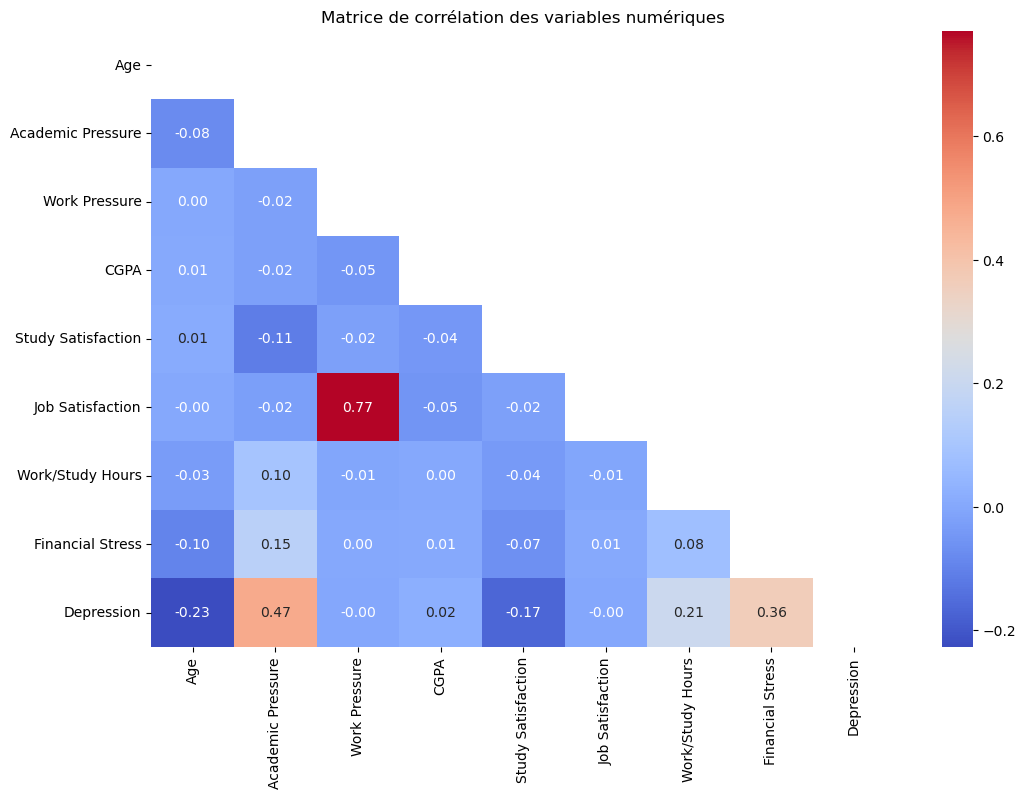

In [35]:
numerical_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns.tolist()

corr_matrix = df_clean[numerical_cols].corr(method='pearson') 

plt.figure(figsize=(12, 8))


#mask=np.triu(...) : Masque la partie supérieure de la matrice (redondante car symétrique)

sns.heatmap(corr_matrix, 
            annot=True, #pour Affiche les valeurs de corrélation
            cmap='coolwarm', 
            fmt=".2f",
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))

plt.title('Matrice de corrélation des variables numériques')

plt.show()



# 2. Corrélations avec la variable cible (Depression)

**Définir la variable cible.**

**Extraire la colonne de corrélation correspondant à la variable cible 'Depression' depuis la matrice complète.**

**Supprime la corrélation de 'Depression' avec elle-même (qui est toujours 1).**

La je veux mettre en évidence spécifiquement quelles variables numériques ont la plus forte relation *linéaire* (positive ou négative) avec la probabilité de dépression (classe 1).
C'est une première indication des features potentiellement importantes

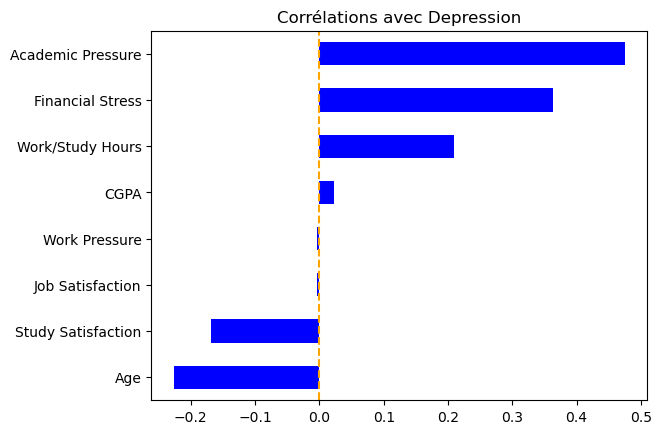

In [40]:
target = 'Depression'

corr_with_target = corr_matrix[target].drop(target).sort_values()

corr_with_target.plot(kind='barh', color='blue')

plt.title(f'Corrélations avec {target}')
plt.axvline(0, color='orange', linestyle='--')

plt.show()


Je constate que academic Pressure' a la corrélation positive la plus forte avec 'Depression'.
- 'Financial Stress' a aussi une corrélation positive notable.
- 'Work/Study Hours' montre une corrélation positive modérée.
- 'Study Satisfaction' a la corrélation négative la plus notable.

La corrélation mesure uniquement les relations *linéaires*. Des relations non-linéaires importantes pourraient exister. Donc je vais par la suite créer un paiplot pour mieux voir les relation non lineaire

# Créer un graphique à barres horizontales pour visualiser la corrélation de chaque variable numérique avec la cible.

Je vais Prendre un échantillon aléatoire de 1000 lignes du DataFrame nettoyé. l'échantillon permet d'avoir une vue représentative plus rapidement et plus clairement pour pas utiliser tou le df.

**random_state=42 : Assure que l'échantillon est le même à chaque exécution**


**on se concentre sur les var qui semblaient corrélées.**

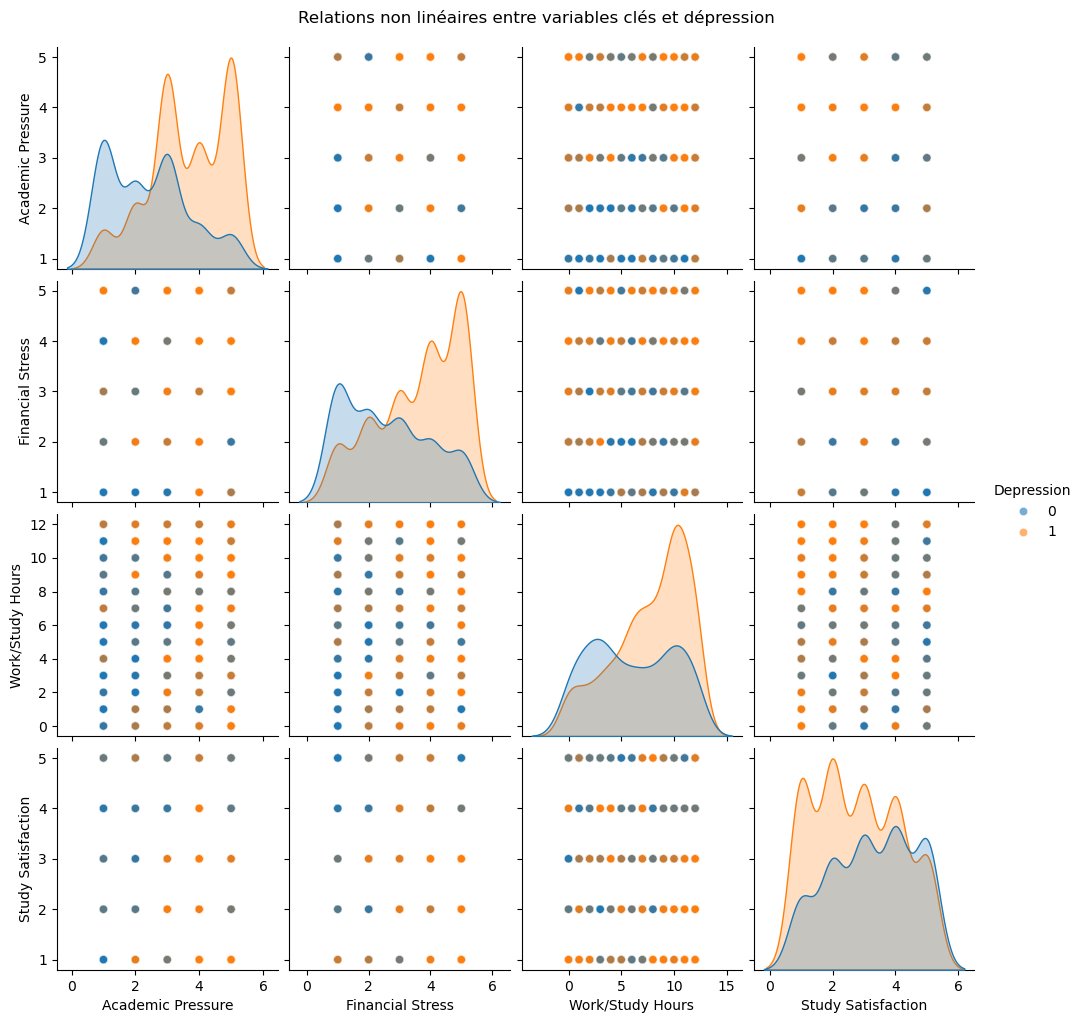

In [45]:
sample_df = df_clean.sample(1000, random_state=42) 

# Pairplot avec distinction de la variable cible (Depression)

sns.pairplot(sample_df, 
             vars=['Academic Pressure', 'Financial Stress', 'Work/Study Hours', 'Study Satisfaction'],
             hue='Depression',
             plot_kws={'alpha': 0.6})

plt.suptitle("Relations non linéaires entre variables clés et dépression", y=1.02)

plt.show()

# Interprétation (Basée sur le Pairplot) :

- Diagonales (KDE) : On observe visuellement que les distributions de 'Academic Pressure', 'Financial Stress', et 'Work/Study Hours'
sont décalées vers des valeurs plus élevées pour la classe 'Depression=1' 
par rapport à la classe 'Depression=0' . Inversement pour 'Study Satisfaction'.

**Cela confirme visuellement les tendances vues avec la corrélation.**

**- Le pairplot renforce l'idée que ces 4 variables sont pertinentes pour distinguer les classes, même si la relation n'est pas parfaitement linéaire ou simple.**

Resumé jusque la :

Les données sont propres (pas de NaN).
La cible est binaire avec un déséquilibre modéré.
Plusieurs variables numériques montrent des corrélations linéaires intéressantes avec la cible.
Le pairplot confirme ces tendances et montre la nature discrète probable de certaines variables.

# Je vais inspecter les valeurs de chaque colonne categorique 

In [49]:
df_clean['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    8309
7-8 hours            7346
5-6 hours            6181
More than 8 hours    6044
Others                 18
Name: count, dtype: int64

In [50]:
df_clean['Gender'].value_counts()

Gender
Male      15546
Female    12352
Name: count, dtype: int64

In [51]:
df_clean['City'].value_counts()

City
Kalyan                1570
Srinagar              1372
Hyderabad             1339
Vasai-Virar           1290
Lucknow               1155
Thane                 1139
Ludhiana              1111
Agra                  1094
Surat                 1078
Kolkata               1065
Jaipur                1036
Patna                 1007
Visakhapatnam          969
Pune                   968
Ahmedabad              951
Bhopal                 934
Chennai                885
Meerut                 825
Rajkot                 816
Delhi                  768
Bangalore              767
Ghaziabad              745
Mumbai                 699
Vadodara               694
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 609
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Kibara                   1
Nandini                  1
Nalini                 

In [56]:
df_clean['Profession'].value_counts()

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

In [58]:
df_clean['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10316
Moderate      9921
Healthy       7649
Others          12
Name: count, dtype: int64

In [60]:
df_clean['Degree'].value_counts()

Degree
Class 12    6080
B.Ed        1866
B.Com       1506
B.Arch      1478
BCA         1432
MSc         1190
B.Tech      1152
MCA         1044
M.Tech      1022
BHM          925
BSc          888
M.Ed         821
B.Pharm      810
M.Com        734
BBA          696
MBBS         695
LLB          671
BE           613
BA           600
M.Pharm      582
MD           572
MBA          562
MA           544
PhD          522
LLM          482
MHM          191
ME           185
Others        35
Name: count, dtype: int64

In [62]:
df_clean['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
Yes    17656
No     10242
Name: count, dtype: int64

In [64]:
df_clean['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     14397
Yes    13501
Name: count, dtype: int64

**Stratégie Sleep Duration : Supprimer les lignes avec "Others", puis mapper les catégories restantes vers des valeurs numériques ordinales.**

In [67]:
# Suppression des lignes où 'Sleep Duration' est 'Others'
df_clean = df_clean[df_clean['Sleep Duration'] != 'Others'].copy()
# .copy() est ajouté pour éviter un potentiel SettingWithCopyWarning plus tard

print(f"Nombre de lignes après suppression 'Others': {len(df_clean)}")

# Mappage des catégories claires vers des valeurs numériques
sleep_mapping = {
    "Less than 5 hours": 4.0,  # Vous pouvez choisir une valeur spécifique, comme 4.5
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9.0 # Vous pouvez choisir une valeur spécifique, comme 8.5 ou 9
}
df_clean['Sleep_Duration_Numeric'] = df_clean['Sleep Duration'].map(sleep_mapping)

# Supprimer l'ancienne colonne 'Sleep Duration'
df_clean.drop('Sleep Duration', axis=1, inplace=True)

print("\nAprès traitement de 'Sleep Duration':")
df_clean[['Sleep_Duration_Numeric']].head()

Nombre de lignes après suppression 'Others': 27880

Après traitement de 'Sleep Duration':


,Sleep_Duration_Numeric
0,5.5
1,5.5
2,4.0
3,7.5
4,5.5


**Stratégie Gender : Label Encoding (0 pour 'Male', 1 pour 'Female')**

In [70]:
gender_mapping = {'Male': 0, 'Female': 1}
df_clean['Gender_Encoded'] = df_clean['Gender'].map(gender_mapping)

# Supprimer l'ancienne colonne 'Gender'
df_clean.drop('Gender', axis=1, inplace=True)

print("\nAprès traitement de 'Gender':")
df_clean['Gender_Encoded'].value_counts()
df_clean[['Gender_Encoded']].head()


Après traitement de 'Gender':


,Gender_Encoded
0,0
1,1
2,0
3,1
4,1


**City Stratégie : Garder les 10 villes les plus fréquentes, regrouper les autres dans "Other_City", puis appliquer One-Hot Encoding.**

In [73]:
# Identifier les 30 villes les plus fréquentes
top_30_cities = df_clean['City'].value_counts().nlargest(30).index

# Créer une nouvelle colonne où les villes non-top-10 sont 'Other_City'
df_clean['City_Processed'] = df_clean['City'].apply(lambda x: x if x in top_30_cities else 'Other_City')

print("\nAprès regroupement des villes ('City_Processed'):")
print(df_clean['City_Processed'].value_counts())

# Appliquer One-Hot Encoding à 'City_Processed'
# dtype=int pour avoir 0/1
df_clean = pd.get_dummies(df_clean, columns=['City_Processed'], prefix='City', dtype=int)

# Supprimer l'ancienne colonne 'City' originale
df_clean.drop('City', axis=1, inplace=True)

print("\nAprès One-Hot Encoding de 'City' (quelques colonnes en exemple):")
df_clean.filter(like='City_').head()


Après regroupement des villes ('City_Processed'):
City_Processed
Kalyan           1569
Srinagar         1370
Hyderabad        1338
Vasai-Virar      1289
Lucknow          1155
Thane            1139
Ludhiana         1109
Agra             1093
Surat            1078
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     968
Pune              968
Ahmedabad         950
Bhopal            934
Chennai           885
Meerut            824
Rajkot            816
Bangalore         767
Delhi             766
Ghaziabad         745
Mumbai            698
Vadodara          694
Varanasi          684
Nagpur            649
Indore            643
Kanpur            608
Nashik            547
Faridabad         460
Other_City         26
Name: count, dtype: int64

Après One-Hot Encoding de 'City' (quelques colonnes en exemple):


,City_Agra,City_Ahmedabad,City_Bangalore,City_Bhopal,City_Chennai,City_Delhi,City_Faridabad,City_Ghaziabad,City_Hyderabad,City_Indore,...,City_Patna,City_Pune,City_Rajkot,City_Srinagar,City_Surat,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_clean['Is_Student'] = df_clean['Profession'].apply(lambda x: 1 if x == 'Student' else 0)

# Supprimer l'ancienne colonne 'Profession'
df_clean.drop('Profession', axis=1, inplace=True)

print("\nAprès traitement de 'Profession':")
print(df_clean[['Is_Student']].head())


Après traitement de 'Profession':
   Is_Student
0           1
1           1
2           1
3           1
4           1


**Dietary Habits Stratégie : One-Hot Encoding**

In [78]:
df_clean = pd.get_dummies(df_clean, columns=['Dietary Habits'], dtype=int)

print("\nAprès One-Hot Encoding de 'Dietary Habits' le df")
df_clean.head()


Après One-Hot Encoding de 'Dietary Habits' le df


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,...,City_Thane,City_Vadodara,City_Varanasi,City_Vasai-Virar,City_Visakhapatnam,Is_Student,Dietary Habits_Healthy,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy
0,33.0,5.0,0.0,8.97,2.0,0.0,B.Pharm,Yes,3.0,1.0,...,0,0,0,0,1,1,1,0,0,0
1,24.0,2.0,0.0,5.90,5.0,0.0,BSc,No,3.0,2.0,...,0,0,0,0,0,1,0,1,0,0
2,31.0,3.0,0.0,7.03,5.0,0.0,BA,No,9.0,1.0,...,0,0,0,0,0,1,1,0,0,0
3,28.0,3.0,0.0,5.59,2.0,0.0,BCA,Yes,4.0,5.0,...,0,0,1,0,0,1,0,1,0,0
4,25.0,4.0,0.0,8.13,3.0,0.0,M.Tech,Yes,1.0,1.0,...,0,0,0,0,0,1,0,1,0,0


**Degree Stratégie : Regroupement par niveau, puis One-Hot Encoding.**

In [81]:
def group_degree(deg):
    deg_str = str(deg).lower() # Convertir en str et en minuscule
    if 'class 12' in deg_str or '12th' in deg_str:
        return 'Class_12'
    elif deg_str.startswith('b.') or deg_str in ['ba', 'bsc', 'bhm', 'bba', 'bca', 'be', 'llb', 'mbbs']: # Ajout de plus de bachelors
        return 'Bachelor'
    elif deg_str.startswith('m.') or deg_str in ['mba', 'msc', 'mpharm', 'ma', 'mhm', 'me', 'md', 'llm']: # Ajout de plus de masters/MD
        return 'Master_MD'
    elif 'phd' in deg_str:
        return 'PhD'
    elif deg_str == 'others':
        return 'Other_Degree'
    else:
        return 'Other_Degree'

df_clean['Degree_Grouped'] = df_clean['Degree'].apply(group_degree)

print("\nAprès regroupement des diplômes ('Degree_Grouped'):")
print(df_clean['Degree_Grouped'].value_counts())

# Appliquer One-Hot Encoding à 'Degree_Grouped'
df_clean = pd.get_dummies(df_clean, columns=['Degree_Grouped'], prefix='Degree', dtype=int)

# Supprimer l'ancienne colonne 'Degree'
df_clean.drop('Degree', axis=1, inplace=True)

print("\nAprès One-Hot Encoding de 'Degree' (quelques colonnes en exemple):")
df_clean.filter(like='Degree_').head()


Après regroupement des diplômes ('Degree_Grouped'):
Degree_Grouped
Bachelor        13322
Master_MD        6880
Class_12         6080
Other_Degree     1078
PhD               520
Name: count, dtype: int64

Après One-Hot Encoding de 'Degree' (quelques colonnes en exemple):


,Degree_Bachelor,Degree_Class_12,Degree_Master_MD,Degree_Other_Degree,Degree_PhD
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0


**Have you ever had suicidal thoughts ?
Stratégie : Label Encoding (Yes=1, No=0).**

In [84]:
suicidal_mapping = {'Yes': 1, 'No': 0}
# Renommer la colonne pour éviter les problèmes avec les caractères spéciaux et la longueur
df_clean.rename(columns={'Have you ever had suicidal thoughts ?': 'Suicidal_Thoughts_Raw'}, inplace=True)
df_clean['Suicidal_Thoughts_Encoded'] = df_clean['Suicidal_Thoughts_Raw'].map(suicidal_mapping)

# Supprimer l'ancienne colonne
df_clean.drop('Suicidal_Thoughts_Raw', axis=1, inplace=True)

print("\nAprès traitement de 'Suicidal_Thoughts_Encoded':")
df_clean[['Suicidal_Thoughts_Encoded']].head()


Après traitement de 'Suicidal_Thoughts_Encoded':


,Suicidal_Thoughts_Encoded
0,1
1,0
2,0
3,1
4,1


**Family History of Mental Illness
Stratégie : Label Encoding (Yes=1, No=0).**

In [87]:
family_history_mapping = {'Yes': 1, 'No': 0}
df_clean['Family_History_Encoded'] = df_clean['Family History of Mental Illness'].map(family_history_mapping)

# Supprimer l'ancienne colonne
df_clean.drop('Family History of Mental Illness', axis=1, inplace=True)

print("\nAprès traitement de 'Family_History_Encoded':")
df_clean[['Family_History_Encoded']].head()


Après traitement de 'Family_History_Encoded':


,Family_History_Encoded
0,0
1,1
2,1
3,1
4,0


In [89]:
print("\n--- Informations finales sur df_clean ---")
df_clean.info()

print("\n--- Premières lignes de df_clean après toutes les transformations ---")
df_clean.head()


--- Informations finales sur df_clean ---
<class 'pandas.core.frame.DataFrame'>
Index: 27880 entries, 0 to 27900
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        27880 non-null  float64
 1   Academic Pressure          27880 non-null  float64
 2   Work Pressure              27880 non-null  float64
 3   CGPA                       27880 non-null  float64
 4   Study Satisfaction         27880 non-null  float64
 5   Job Satisfaction           27880 non-null  float64
 6   Work/Study Hours           27880 non-null  float64
 7   Financial Stress           27880 non-null  float64
 8   Depression                 27880 non-null  int64  
 9   Sleep_Duration_Numeric     27880 non-null  float64
 10  Gender_Encoded             27880 non-null  int64  
 11  City_Agra                  27880 non-null  int32  
 12  City_Ahmedabad             27880 non-null  int32  
 13  City_Ban

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Sleep_Duration_Numeric,...,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Degree_Bachelor,Degree_Class_12,Degree_Master_MD,Degree_Other_Degree,Degree_PhD,Suicidal_Thoughts_Encoded,Family_History_Encoded
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,5.5,...,0,0,0,1,0,0,0,0,1,0
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,5.5,...,1,0,0,1,0,0,0,0,0,1
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,4.0,...,0,0,0,1,0,0,0,0,0,1
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,7.5,...,1,0,0,1,0,0,0,0,1,1
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,5.5,...,1,0,0,0,0,1,0,0,1,0


 #  Mise à l'échelle des Variables Numériques (Feature Scaling)

In [92]:
from sklearn.preprocessing import StandardScaler

original_numerical_cols = [
    'Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
    'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
    'Financial Stress', 'Sleep_Duration_Numeric'
]

cols_to_scale = [col for col in original_numerical_cols if col in df_clean.columns]


scaler = StandardScaler()

df_clean[cols_to_scale] = scaler.fit_transform(df_clean[cols_to_scale])

print("\n--- df_clean après mise à l'échelle (quelques colonnes numériques en exemple) ---")
df_clean[cols_to_scale].head()


--- df_clean après mise à l'échelle (quelques colonnes numériques en exemple) ---


,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Sleep_Duration_Numeric
0,1.463374,1.345217,-0.00978,0.893358,-0.693493,-0.015345,-1.121284,-1.489038,-0.437387
1,-0.371245,-0.826029,-0.00978,-1.194180,1.510716,-0.015345,-1.121284,-0.793282,-0.437387
2,1.055681,-0.102280,-0.00978,-0.425803,1.510716,-0.015345,0.497192,-1.489038,-1.219662
3,0.444141,-0.102280,-0.00978,-1.404974,-0.693493,-0.015345,-0.851538,1.293986,0.605646
4,-0.167398,0.621468,-0.00978,0.322175,0.041243,-0.015345,-1.660776,-1.489038,-0.437387


#  Séparation des Données (Features X et Cible y) et Division en Ensembles d'Entraînement et de Test

In [102]:
from sklearn.model_selection import train_test_split
X = df_clean.drop('Depression', axis=1)  # Toutes les colonnes sauf 'Depression'
y = df_clean['Depression']             # Uniquement la colonne 'Depression'

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entrainement Régression Logistique.


Modèle Régression Logistique initialisé.

Entraînement du modèle Régression Logistique...
Entraînement terminé.

Prédictions sur l'ensemble de test...
Prédictions terminées.

--- Évaluation de la Régression Logistique ---
Accuracy: 0.8503
Precision: 0.8603
Recall: 0.8885
F1-score: 0.8742
ROC AUC Score: 0.9232

Rapport de Classification:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      2311
           1       0.86      0.89      0.87      3265

    accuracy                           0.85      5576
   macro avg       0.85      0.84      0.84      5576
weighted avg       0.85      0.85      0.85      5576


Matrice de Confusion:
[[1840  471]
 [ 364 2901]]


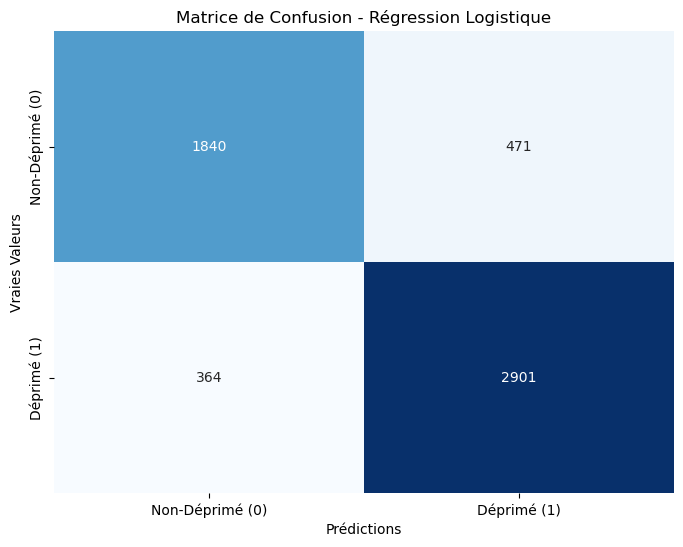

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# --- 1. Initialisation du modèle Régression Logistique ---
# random_state pour la reproductibilité des résultats si le solveur est stochastique.
# solver='liblinear' est un bon choix pour les petits datasets et les problèmes binaires.
# max_iter pour s'assurer que le modèle converge (augmenter si vous avez un warning de convergence).
log_reg_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

print("Modèle Régression Logistique initialisé.")


print("\nEntraînement du modèle Régression Logistique...")
log_reg_model.fit(X_train, y_train)
print("Entraînement terminé.")

print("\nPrédictions sur l'ensemble de test...")
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1] # Probabilités pour la classe positive (1)

print("Prédictions terminées.")

# --- 4. Évaluation du modèle ---
print("\n--- Évaluation de la Régression Logistique ---")

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy: {accuracy_lr:.4f}")

# Precision
precision_lr = precision_score(y_test, y_pred_log_reg)
print(f"Precision: {precision_lr:.4f}")

# Recall
recall_lr = recall_score(y_test, y_pred_log_reg)
print(f"Recall: {recall_lr:.4f}")

# F1-score
f1_lr = f1_score(y_test, y_pred_log_reg)
print(f"F1-score: {f1_lr:.4f}")

# ROC AUC Score
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_log_reg)
print(f"ROC AUC Score: {roc_auc_lr:.4f}")

# Rapport de classification (qui inclut precision, recall, f1-score par classe)
print("\nRapport de Classification:")
print(classification_report(y_test, y_pred_log_reg))

# Matrice de Confusion
print("\nMatrice de Confusion:")
cm_lr = confusion_matrix(y_test, y_pred_log_reg)
print(cm_lr)

# Visualisation de la Matrice de Confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Déprimé (0)', 'Déprimé (1)'],
            yticklabels=['Non-Déprimé (0)', 'Déprimé (1)'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies Valeurs')
plt.title('Matrice de Confusion - Régression Logistique')
plt.show()

**Accuracy : 0.8503**
Globalement, le modèle a correctement classifié environ 85% des individus de l'ensemble de test. C'est un bon point de départ.

**ROC AUC Score : 0.9232**
C'est un très bon score ! Cela indique que le modèle a une excellente capacité à distinguer entre les personnes déprimées et non-déprimées. Un score proche de 1 est idéal.

# Sauvegarde JobLib

In [126]:
import joblib

print("--- Début de la sauvegarde des éléments pour le déploiement ---")

# --- 1. Sauvegarder le modèle Régression Logistique entraîné ---
#'log_reg_model' est le nom de notre modèle entraîné
try:
    joblib.dump(log_reg_model, 'logistic_regression_dep_model.joblib')
    print("Modèle Régression Logistique sauvegardé : logistic_regression_dep_model.joblib")
except NameError:
    print("ERREUR: La variable 'log_reg_model' n'est pas définie. Veuillez vérifier le nom de votre modèle.")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de log_reg_model : {e}")


# --- 2. Sauvegarder le StandardScaler ---
try:
    joblib.dump(scaler, 'scaler_dep.joblib')
    print("StandardScaler sauvegardé : scaler_dep.joblib")
except NameError:
    print("ERREUR: La variable 'scaler' n'est pas définie. Veuillez vérifier le nom de votre scaler.")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de scaler : {e}")


# --- 3. Sauvegarder les informations de prétraitement ---

label_encoded_cols_mappings = {
    'Gender_Encoded': {'Male': 0, 'Female': 1},
    'Suicidal_Thoughts_Encoded': {'Yes': 1, 'No': 0},
    'Family_History_Encoded': {'Yes': 1, 'No': 0}
}
try:
    joblib.dump(label_encoded_cols_mappings, 'label_mappings_dep.joblib')
    print("Mappings de Label Encoding sauvegardés : label_mappings_dep.joblib")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de label_mappings_dep.joblib : {e}")


# b) Liste des colonnes finales d'entraînement
try:
    final_training_columns = X_train.columns.tolist()
    joblib.dump(final_training_columns, 'final_training_columns.joblib')
    print("Liste des colonnes d'entraînement finales sauvegardée : final_training_columns.joblib")
except NameError:
    print("ERREUR: La variable 'X_train' n'est pas définie. Veuillez vérifier le nom de votre DataFrame d'entraînement.")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de final_training_columns.joblib : {e}")


# c) Liste des colonnes originales qui ont été One-Hot Encodées avec pd.get_dummies
# Celles-ci étaient 'City_Processed', 'Dietary Habits', 'Degree_Grouped' dans le code
original_cols_for_dummies = ['City_Processed', 'Dietary Habits', 'Degree_Grouped']
try:
    joblib.dump(original_cols_for_dummies, 'original_cols_for_dummies.joblib')
    print("Noms des colonnes originales pour get_dummies sauvegardés : original_cols_for_dummies.joblib")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de original_cols_for_dummies.joblib : {e}")


# d) Liste des noms des colonnes numériques qui ont été mises à l'échelle
# Elle contient les noms des colonnes APRES transformations comme 'Sleep_Duration_Numeric'
try:
    joblib.dump(cols_to_scale, 'cols_to_scale.joblib')
    print("Liste des colonnes à mettre à l'échelle sauvegardée : cols_to_scale.joblib")
except NameError:
    print("ERREUR: La variable 'cols_to_scale' n'est pas définie. Veuillez la définir avec la liste des colonnes qui ont été scalées.")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de cols_to_scale.joblib : {e}")


# e) Mapping pour 'Sleep Duration'
sleep_mapping = {
    "Less than 5 hours": 4.0,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9.0
}
try:
    joblib.dump(sleep_mapping, 'sleep_mapping.joblib')
    print("Mapping pour Sleep Duration sauvegardé : sleep_mapping.joblib")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de sleep_mapping.joblib : {e}")

# f)Liste des top_30_cities
try:
    if 'top_30_cities' in locals() or 'top_30_cities' in globals():
        joblib.dump(top_30_cities, 'top_30_cities.joblib')
        print("Liste top_30_cities sauvegardée : top_30_cities.joblib")
    else:
        print("INFO: La variable 'top_30_cities' n'a pas été trouvée pour la sauvegarde.")
except Exception as e:
    print(f"ERREUR lors de la sauvegarde de top_30_cities.joblib : {e}")

print("--- Fin de la sauvegarde ---")
print("Vérifiez que tous les fichiers .joblib ont été créés dans le même dossier que votre notebook.")

--- Début de la sauvegarde des éléments pour le déploiement ---
Modèle Régression Logistique sauvegardé : logistic_regression_dep_model.joblib
StandardScaler sauvegardé : scaler_dep.joblib
Mappings de Label Encoding sauvegardés : label_mappings_dep.joblib
Liste des colonnes d'entraînement finales sauvegardée : final_training_columns.joblib
Noms des colonnes originales pour get_dummies sauvegardés : original_cols_for_dummies.joblib
Liste des colonnes à mettre à l'échelle sauvegardée : cols_to_scale.joblib
Mapping pour Sleep Duration sauvegardé : sleep_mapping.joblib
Liste top_30_cities sauvegardée : top_30_cities.joblib
--- Fin de la sauvegarde ---
Vérifiez que tous les fichiers .joblib ont été créés dans le même dossier que votre notebook.
